# Project Reality Demo Exploration


## Introduction
I have over 3800 demos from Project Reality with the intent of analyzing the trends of different maps. Specifically, I would like to investigate which maps are unbalanced. 


In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

db_location = 'pr.db'
conn = sqlite3.connect(db_location)

df = pd.read_sql_query('SELECT * FROM demos;',conn)
conn.close()


mapTeams = pd.read_csv('map_modes_tickets.csv')
layerNames = {
    'Layer 64' : 'Standard',
    'Layer 32' : 'Alternative',
    'Layer 16' : 'Infantry',
    'Layer 128': 'Large'
}
df.replace({'layer':layerNames},inplace=True)
df = pd.merge(df,mapTeams, how='left',left_on=['map','mode','layer'],right_on=['map','mode','layer'])

df

,date,server,map,mode,layer,playerCount,ticketsTeam1,ticketsTeam2,version,duration,team1,team2,startingTickets1,startingTickets2
0,2019-10-31 21:54:18,=HOG= Mixed Maps,ramiel,Advance & Secure,Standard,41,0,127,v1.5.5,99,ARF,US Army,800.0,1000.0
1,2019-10-31 23:34:27,=HOG= Mixed Maps,gaza_2,Insurgency,Standard,33,0,653,v1.5.5,117,Hamas,IDF,4.0,800.0
2,2019-11-01 01:32:33,=HOG= Mixed Maps,operation_ghost_train,Advance & Secure,Standard,37,222,0,v1.5.5,53,PLA,BAF,400.0,400.0
3,2019-11-01 02:27:12,=HOG= Mixed Maps,tad_sae,Advance & Secure,Alternative,52,0,191,v1.5.5,77,NVA,US Army Vietnam,500.0,500.0
4,2019-11-01 03:45:05,=HOG= Mixed Maps,asad_khal,Advance & Secure,Alternative,51,476,32,v1.5.5,32,MEC,IDF,600.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,2020-11-25 16:11:33,CSA | Sul-Americano | https://discord.me/csa,hill_488,Advance & Secure,Standard,71,221,0,v1.6.3,64,NVA,US Army Vietnam,600.0,600.0
7808,2020-11-25 17:18:16,CSA | Sul-Americano | https://discord.me/csa,muttrah_city_2,Advance & Secure,Standard,42,3,390,v1.6.3,71,MEC,USMC,750.0,750.0
7809,2020-11-25 17:58:37,Free Candy Van,gaza_2,Advance & Secure,Standard,66,486,20,v1.6.3,45,Hamas,IDF,700.0,700.0
7810,2020-11-25 18:45:00,Free Candy Van,tad_sae,Advance & Secure,Alternative,70,0,39,v1.6.3,49,NVA,US Army Vietnam,500.0,500.0


## Sample
Below I will show a little bit about the data I have gathered.

C:\Users\Nathan\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C20533A108>]],
      dtype=object)

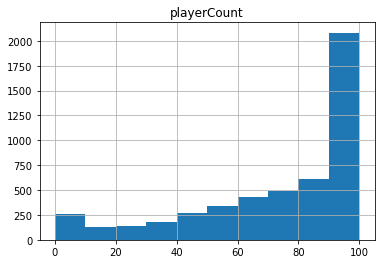

In [3]:
df = df.loc[(df['version'] != 'v1.5.5') & 
            (~df['mode'].isin(['Skirmish','Co-Operative']))
           ]
df.loc[df['server'].str.startswith('PRTA.co'), 'server'] = 'PRTA.co'
df.loc[df['server'].str.startswith('Gamma Group'), 'server'] = 'Gamma Group'
df.loc[df['server'].str.startswith('[DIVSUL'), 'server'] = 'DIVSUL'
df.loc[df['server'].str.startswith('PRSC'), 'server'] = 'DIVSUL'
df.loc[df['server'].str.startswith('CSA'), 'server'] = 'CSA'
df.loc[df['server'].str.startswith('=SF='), 'server'] = 'SF'
df.loc[df['server'].str.startswith("'(SSG)"), 'server'] = 'SSG'

df.hist(column='playerCount')

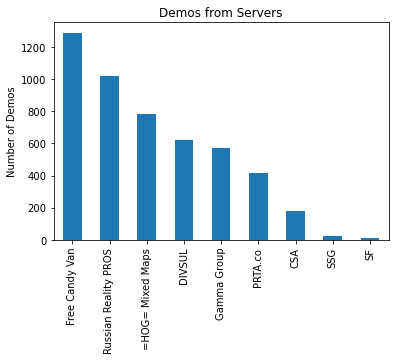

In [4]:
ax = df['server'].value_counts().plot(kind='bar')
ax.set_ylabel('Number of Demos')
ax.set_title('Demos from Servers')
plt.show()

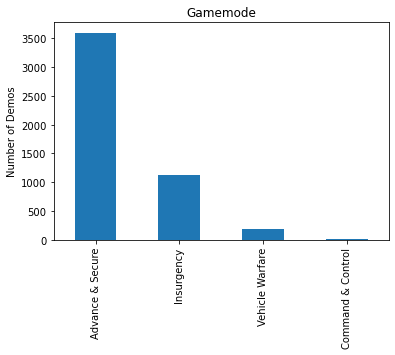

In [5]:
ax = df['mode'].value_counts().plot(kind='bar')
ax.set_ylabel('Number of Demos')
ax.set_title('Gamemode')
plt.show()

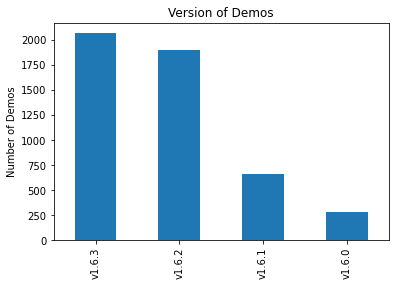

In [6]:
ax = df['version'].value_counts().plot(kind='bar')
ax.set_ylabel('Number of Demos')
ax.set_title('Version of Demos')
plt.show()

## Balancing

In [7]:

minPlayerCount = 50
df = df.loc[df['playerCount'] > minPlayerCount]


In [8]:
df['winningTeam'] = 0
df.loc[df['ticketsTeam1'] == 0, 'winningTeam'] = 2
df.loc[df['ticketsTeam2'] == 0, 'winningTeam'] = 1

ticketWinThreshold = 20

df.loc[(df['winningTeam'] == 0) &
       (df['mode'] != 'Insurgency') &
       (df['ticketsTeam1'] < ticketWinThreshold) &
       (df['ticketsTeam2'] > ticketWinThreshold),
       'winningTeam'] = 2
df.loc[(df['winningTeam'] == 0) &
       (df['mode'] != 'Insurgency') &
       (df['ticketsTeam1'] > ticketWinThreshold) &
       (df['ticketsTeam2'] < ticketWinThreshold),
       'winningTeam'] = 1

df.loc[(df['winningTeam'] == 0) &
       (df['mode'] == 'Insurgency') &
       (df['ticketsTeam1'] > 1) &
       (df['ticketsTeam2'] < ticketWinThreshold),
       'winningTeam'] = 1
df.head()

,date,server,map,mode,layer,playerCount,ticketsTeam1,ticketsTeam2,version,duration,team1,team2,startingTickets1,startingTickets2,winningTeam
267,2020-07-20 17:00:17,=HOG= Mixed Maps,muttrah_city_2,Advance & Secure,Standard,92,302,0,v1.6.2,86,MEC,USMC,750.0,750.0,1
268,2020-07-20 18:26:52,=HOG= Mixed Maps,silent_eagle,Advance & Secure,Standard,100,0,355,v1.6.2,47,Russia,Germany,600.0,600.0,2
269,2020-07-20 19:15:05,=HOG= Mixed Maps,masirah,Advance & Secure,Standard,100,34,0,v1.6.2,75,MEC,France,700.0,700.0,1
270,2020-07-20 20:30:33,=HOG= Mixed Maps,black_gold,Insurgency,Standard,100,0,59,v1.6.2,68,Militia,PLA,3.0,600.0,2
271,2020-07-20 21:39:35,=HOG= Mixed Maps,kafar_halab,Advance & Secure,Standard,87,0,88,v1.6.2,59,FSA,Russia,720.0,600.0,2


C:\Users\Nathan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


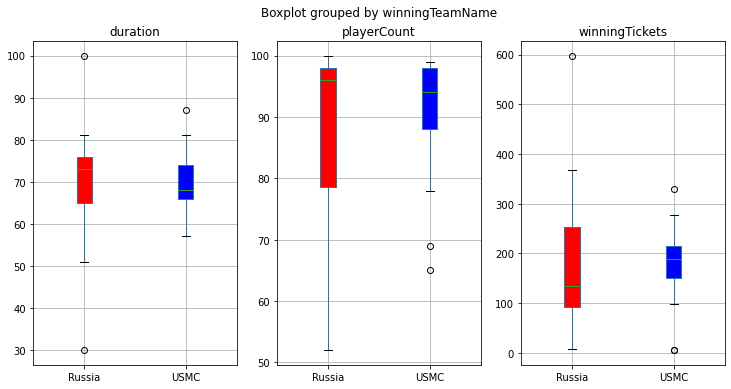

In [9]:
testMap = {'map': 'pavlovsk_bay',
           'mode': 'Advance & Secure',
           'layer': 'Standard'}
testdf = df.loc[(df['map'] == testMap['map']) & 
                (df['mode'] == testMap['mode']) & 
                (df['layer'] == testMap['layer']), ['playerCount', 'ticketsTeam1', 'ticketsTeam2','duration','winningTeam','team1','team2']]

testdf['winningTickets'] = 0
testdf['winningTeamName'] = ''
team2df = testdf.loc[testdf['winningTeam'] == 2]
team1df = testdf.loc[testdf['winningTeam'] == 1]
testdf.loc[testdf['winningTeam'] == 2, ['winningTeamName','winningTickets']] = team2df[['team2','ticketsTeam2']].values
testdf.loc[testdf['winningTeam'] == 1, ['winningTeamName','winningTickets']] = team1df[['team1','ticketsTeam1']].values
if testdf['team1'].iloc[0] > testdf['team2'].iloc[0]:
    colors = ['blue','red']
else:
    colors = ['red','blue']
testdf = testdf[['playerCount','duration','winningTickets','winningTeamName']]


testdf = testdf.query('winningTeamName != ""')
fig, ax_new = plt.subplots(1,3,figsize=(12,6))
bp_dict = testdf.boxplot(
    by="winningTeamName",ax=ax_new,
    return_type='both',
    patch_artist = True
)
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()


In [10]:
counts = df.loc[(df['winningTeam'] > 0)
      ].groupby(['map','mode','layer','winningTeam'])['date'].agg(['count'])
counts

count
map        mode              layer       winningTeam       
albasrah_2 Insurgency        Alternative 1                1
                                         2               11
                             Infantry    1                2
                                         2                3
                             Standard    1               14
...                                                     ...
yamalia    Advance & Secure  Alternative 2                8
                             Infantry    2                2
                             Standard    1                4
                                         2                8
           Command & Control Infantry    1                1

[345 rows x 1 columns]

In [11]:
percentMaps = counts.groupby(level=[0,1,2]).apply(lambda g: g/g.sum()).reset_index()
percentMaps.rename(columns={'count': 'winPercent'}, inplace=True)
percentMaps['team1WinPercent'] = 0
percentMaps['team2WinPercent'] = 0
percentMaps.loc[percentMaps['winningTeam'] == 1, 'team1WinPercent'] = percentMaps['winPercent']
percentMaps.loc[percentMaps['winningTeam'] == 1, 'team2WinPercent'] = 1 - percentMaps['winPercent']
percentMaps.loc[percentMaps['winningTeam'] == 2, 'team2WinPercent'] = percentMaps['winPercent']
percentMaps.loc[percentMaps['winningTeam'] == 2, 'team1WinPercent'] = 1- percentMaps['winPercent']

percentMaps.drop(columns=['winningTeam','winPercent'], inplace=True)
percentMaps = percentMaps.drop_duplicates(['map','mode','layer'])
percentMaps.set_index(['map','mode','layer'], inplace=True)
percentMaps['count'] = counts.reset_index().groupby(['map','mode','layer'])['count'].agg(['sum'])['sum']
percentMaps.sort_values('count', ascending=False, inplace=True)

percentMaps.reset_index(inplace=True)

onek = ['asad_khal','assault_on_mestia','fallujah_west','hill_488','korengal',
        'merville','operation_ghost_train','reichswald','tad_sae']
fourk = ['bijar_canyons','black_gold','burning_sands','hades_peak',
        'kashan_desert','khamisiyah','masirah','operation_soul_rebel',
        'iron_thunder','pavlovsk_bay','saaremaa','silent_eagle',
        'vadso_city','wanda_shan','xiangshan']
np.sort(df['map'].unique())
percentMaps['size'] = 2
percentMaps.loc[percentMaps['map'].isin(onek),'size'] = 1
percentMaps.loc[percentMaps['map'].isin(fourk),'size'] = 4
percentMaps.loc[percentMaps['map'] == 'the_falklands','size'] = 8
percentMaps.iloc[:15]

,map,mode,layer,team1WinPercent,team2WinPercent,count,size
0,fallujah_west,Insurgency,Standard,0.244275,0.755725,131,1
1,muttrah_city_2,Advance & Secure,Standard,0.426230,0.573770,122,2
2,beirut,Advance & Secure,Standard,0.554455,0.445545,101,2
3,masirah,Advance & Secure,Standard,0.393617,0.606383,94,4
4,burning_sands,Advance & Secure,Standard,0.329787,0.670213,94,4
5,operation_marlin,Advance & Secure,Standard,0.558140,0.441860,86,2
6,gaza_2,Insurgency,Standard,0.302632,0.697368,76,2
7,saaremaa,Advance & Secure,Standard,0.394366,0.605634,71,4
8,kafar_halab,Advance & Secure,Standard,0.287879,0.712121,66,2
9,operation_falcon,Advance & Secure,Standard,0.459016,0.540984,61,2


In [12]:
percentMaps.loc[(percentMaps['map'] == testMap['map']) & 
                (percentMaps['mode'] == testMap['mode']) & 
                (percentMaps['layer'] == testMap['layer'])]

,map,mode,layer,team1WinPercent,team2WinPercent,count,size
32,pavlovsk_bay,Advance & Secure,Standard,0.527778,0.472222,36,4


In [13]:
minimumNumberOfPlays = 20
balanceThreshold = 0.55
percentMaps.loc[(percentMaps['count'] > minimumNumberOfPlays) &
                (percentMaps['team1WinPercent'] <= balanceThreshold) &
                (percentMaps['team2WinPercent'] <= balanceThreshold)
               ]

,map,mode,layer,team1WinPercent,team2WinPercent,count,size
9,operation_falcon,Advance & Secure,Standard,0.459016,0.540984,61,2
20,kashan_desert,Advance & Secure,Standard,0.478261,0.521739,46,4
21,operation_falcon,Advance & Secure,Large,0.521739,0.478261,46,2
23,asad_khal,Advance & Secure,Standard,0.534884,0.465116,43,1
26,black_gold,Advance & Secure,Standard,0.487805,0.512195,41,4
27,reichswald,Advance & Secure,Standard,0.475000,0.525000,40,1
28,battle_of_ia_drang,Advance & Secure,Standard,0.475000,0.525000,40,2
32,pavlovsk_bay,Advance & Secure,Standard,0.527778,0.472222,36,4
41,musa_qala,Insurgency,Standard,0.483871,0.516129,31,2
48,goose_green,Advance & Secure,Standard,0.535714,0.464286,28,2


In [14]:
unbalanceThreshold = 0.7
percentMaps.loc[(percentMaps['count'] > minimumNumberOfPlays) &
                ((percentMaps['team1WinPercent'] >= unbalanceThreshold) |
                (percentMaps['team2WinPercent'] >= unbalanceThreshold))
               ]
# percentMaps.reset_index(inplace=True)
# percentMaps.loc[percentMaps['map'] == 'iron_thunder']

,map,mode,layer,team1WinPercent,team2WinPercent,count,size
0,fallujah_west,Insurgency,Standard,0.244275,0.755725,131,1
8,kafar_halab,Advance & Secure,Standard,0.287879,0.712121,66,2
13,kafar_halab,Advance & Secure,Alternative,0.254902,0.745098,51,2
18,fallujah_west,Insurgency,Infantry,0.183673,0.816327,49,1
22,iron_thunder,Advance & Secure,Standard,0.711111,0.288889,45,4
24,ras_el_masri_2,Insurgency,Standard,0.744186,0.255814,43,2
34,route,Advance & Secure,Standard,0.277778,0.722222,36,2
39,fallujah_west,Insurgency,Alternative,0.187500,0.812500,32,1
56,dovre_winter,Advance & Secure,Standard,0.739130,0.260870,23,2
60,operation_archer,Insurgency,Standard,0.190476,0.809524,21,2


In [15]:
ticketThreshold = 40
closeGames = df.loc[(df['mode'] == 'Advance & Secure') 
       & (df['playerCount'] > 50) 
       & (df['ticketsTeam1'] < ticketThreshold) 
       & (df['ticketsTeam2'] < ticketThreshold)].groupby(['map', 'layer'])['date'].agg(['count'])
closeGames.sort_values(by='count', ascending=False, inplace=True)
closeGames.loc[closeGames['count'] > 5]

,,count
map,layer,
beirut,Standard,13
masirah,Standard,13
operation_marlin,Standard,10
muttrah_city_2,Standard,9
saaremaa,Standard,9
khamisiyah,Standard,8
battle_of_ia_drang,Standard,8
gaza_2,Standard,7
burning_sands,Standard,7


In [16]:
np.sort(percentMaps['map'].unique())

array(['albasrah_2', 'asad_khal', 'assault_on_grozny',
       'assault_on_mestia', 'bamyan', 'battle_of_ia_drang', 'beirut',
       'bijar_canyons', 'black_gold', 'brecourt_assault', 'burning_sands',
       'carentan', 'charlies_point', 'dovre', 'dovre_winter',
       'dragon_fly', 'fallujah_west', 'fools_road', 'gaza_2',
       'goose_green', 'hades_peak', 'hill_488', 'iron_ridge',
       'iron_thunder', 'jabal', 'kafar_halab', 'karbala', 'kashan_desert',
       'khamisiyah', 'kokan', 'korengal', 'kozelsk', 'lashkar_valley',
       'masirah', 'merville', 'musa_qala', 'muttrah_city_2', 'nuijamaa',
       'omaha_beach', 'op_barracuda', 'operation_archer',
       'operation_falcon', 'operation_ghost_train', 'operation_marlin',
       'operation_soul_rebel', 'outpost', 'pavlovsk_bay', 'qwai1',
       'ramiel', 'ras_el_masri_2', 'reichswald', 'route', 'saaremaa',
       'sahel', 'sbeneh_outskirts', 'shahadah', 'shijiavalley',
       'silent_eagle', 'tad_sae', 'the_falklands', 'ulyanovsk',
